In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
#https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41

In [47]:
def create_storage_tanks_existing(storage_tanks_df):
    fig, ax = plt.subplots(figsize=(15, 8))
    # pass colors values to `color=`
    ax.clear()
    ax.barh(storage_tanks_df['Dataset'], storage_tanks_df["Number of Aboveground Storage Tank Annotations"], color="powderblue")
    #ax.set_xscale("log")
    # iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
    for i, (value, dataset, class_type) in enumerate(zip(storage_tanks_df[1:]["Number of Aboveground Storage Tank Annotations"], 
                                                         storage_tanks_df['Dataset'][1:], storage_tanks_df[1:]['Storage tank class'])):
        i = i+1
        ax.text(value, i, dataset, ha='right', va='bottom', size=16, weight=600)  
        ax.text(value, i-.25, class_type,  ha='right', va='baseline', size=14, color='#777777') 
    for i, (value,dataset,class_type) in enumerate(zip(storage_tanks_df[:1]["Number of Aboveground Storage Tank Annotations"], 
                                                         storage_tanks_df['Dataset'][:1], storage_tanks_df[:1]['Storage tank class'])):
        ax.text(value, i,     dataset, ha='left', va='bottom', size=16, weight=600)  # Tokyo: name
        ax.text(value, i-.25, class_type,  ha='left', size=14, color='#777777')
    # Format Plot
    ax.text(0, 1.06, 'Aboveground Storage Tank Annotations (thousands)', transform=ax.transAxes, size=12, color='#777777')
    #ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    #ax.set_xticks([0,5,10,15])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Existing publicly available AST datasets size',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    fig.savefig("Size of Existing Publicly Available AST Datasets.jpg", dpi=900)

In [48]:
def create_storage_tanks_compared_to_robinson(storage_tanks_df):
    fig, ax = plt.subplots(figsize=(15, 8))
    # pass colors values to `color=`
    ax.clear()
    color_list = ["powderblue"]*len(storage_tanks_df) #"#b8cccf"
    #color_list[-1] ="#9bc1c7"

    ax.barh(storage_tanks_df['Dataset'], storage_tanks_df["Number of Aboveground Storage Tank Annotations"], color=color_list)
    #ax.set_xscale("log")
    # iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
    for i, (value, dataset, class_type) in enumerate(zip(storage_tanks_df[:-1]["Number of Aboveground Storage Tank Annotations"], 
                                                         storage_tanks_df['Dataset'][:-1], storage_tanks_df[:-1]['Storage tank class'])):
        #i = i+1
        ax.text(value, i+0.05,     dataset, ha='left', va='bottom', size=16, weight=600)  #Dataset Name
        ax.text(value, i-.25, class_type,  ha='left', va='baseline', size=14, color='#777777')  # Ast class name
    for value,dataset,class_type in zip(storage_tanks_df[-1:]["Number of Aboveground Storage Tank Annotations"], 
                                                         storage_tanks_df['Dataset'][-1:], storage_tanks_df[-1:]['Storage tank class']):
        i = storage_tanks_df[-1:].index[0]
        ax.text(value, i+0.05, dataset, ha='right', va='bottom', size=16, weight=600)  # Tokyo: name
        ax.text(value, i-.25, class_type, ha='right', size=14, color='#777777')  # Asia: group name
    # Format Plot
    ax.text(0, 1.06, 'Aboveground Storage Tank Annotations (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    #ax.set_xticks([0,5,10,15])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Existing publicly available AST datasets size',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    plt.box(False)
    fig.savefig("Existing Publicly Available AST Datasets with Robinson.jpg", dpi=900)

In [49]:
storage_tanks_df = pd.read_csv("/hpc/home/csr33/ast_object_detection/Storage tank count breakdown.csv")
storage_tanks_df["Number of Aboveground Storage Tank Annotations"] = storage_tanks_df["Number of Aboveground Storage Tank Annotations"]/1000

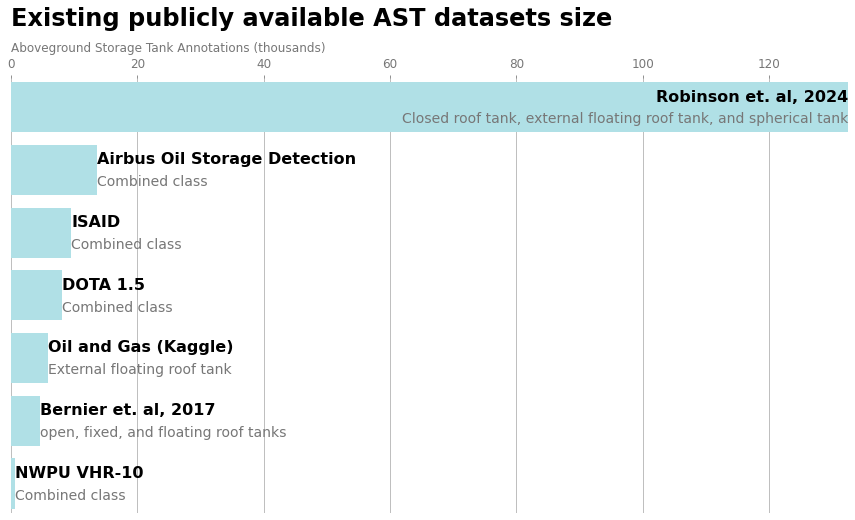

In [50]:
create_storage_tanks_compared_to_robinson(storage_tanks_df)

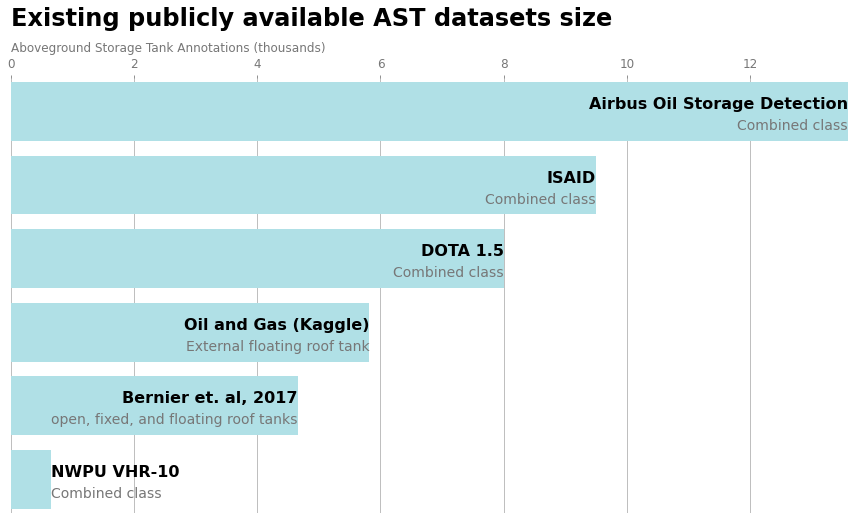

In [51]:
create_storage_tanks_existing(storage_tanks_df[:-1])